In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np


%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Load

In [15]:
df_analyse = pd.read_csv('../data/processed/COVID_small_sync_timeline_table.csv',sep=';')
print(df_analyse)

     doubling every 2 days  doubling every 4 days  doubling every 10 days  \
0               100.000000             100.000000              100.000000   
1               141.421356             118.920712              107.177346   
2               200.000000             141.421356              114.869835   
3               282.842712             168.179283              123.114441   
4               400.000000             200.000000              131.950791   
..                     ...                    ...                     ...   
846                    NaN                    NaN                     NaN   
847                    NaN                    NaN                     NaN   
848                    NaN                    NaN                     NaN   
849                    NaN                    NaN                     NaN   
850                    NaN                    NaN                     NaN   

          Italy     US  Spain  Germany  Korea, South  date  
0         155.

In [16]:
country_list=df_analyse.columns[:]

# Helper functions

In [17]:
def quick_plot(x_in, df_input, y_scale = 'log', slider = False):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
    
        
        Returns:
        ----------
        
    """
    fig = go.Figure()

    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.8))
    
    fig.update_layout(autosize=True,
        width=1024,
        height=768,
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [18]:
quick_plot(df_analyse.date,
           df_analyse.iloc[:,3:-1],
           y_scale='linear',
           slider=True)

# Fitting a polynomial curve

In [19]:
df_poly_check=df_analyse.iloc[0:27,3:-1].reset_index()
df_poly_check

,index,Italy,US,Spain,Germany,"Korea, South"
0,0,155.0,107.0,120.0,117.0,104.0
1,1,229.0,184.0,165.0,150.0,204.0
2,2,322.0,237.0,222.0,188.0,433.0
3,3,453.0,403.0,259.0,240.0,602.0
4,4,655.0,519.0,400.0,349.0,833.0
5,5,888.0,594.0,500.0,534.0,977.0
6,6,1128.0,782.0,673.0,684.0,1261.0
7,7,1694.0,1147.0,1073.0,847.0,1766.0
8,8,2036.0,1586.0,1695.0,1112.0,2337.0
9,9,2502.0,2219.0,2277.0,1296.0,3150.0


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [23]:
y=df_poly_check[['Germany', 'Italy', 'US', 'Spain']].unstack().sort_index(axis=0, level=1)

In [24]:
y.head()

Germany  0    117.0
Italy    0    155.0
US       0    107.0
Spain    0    120.0
Germany  1    150.0
dtype: float64

In [26]:
test_points=28
y_train=y[0:-test_points-1]
y_test=y[-test_points:]

In [30]:
X_train=np.arange(len(y_train)).reshape(-1, 1)/4.0 
X_test=np.arange(len(y_train),len(y_train)+test_points).reshape(-1, 1)/4.0

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
seaborn.set(rc={'figure.figsize': (16,8)})

In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

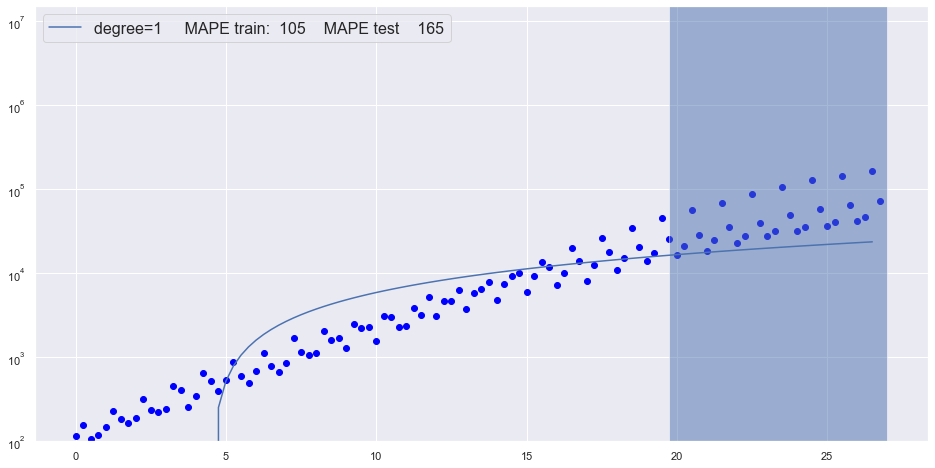

In [36]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y))/4,y, color='blue')
ax1.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

degree=1
y_hat_insaple=PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)


X_plot=np.concatenate((X_train, X_test), axis=None)
y_plot=np.concatenate((y_hat_insaple, y_hat_test), axis=None)

ax1.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
            '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:3]
            +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:3]) 

ax1.set_ylim(100, 15000000)
ax1.set_yscale('log')
ax1.legend(loc='best',
           prop={'size': 16});